In [3]:
# Interactive plots from
# http://matplotlib.1069221.n5.nabble.com/how-to-create-interactive-plots-in-jupyter-python3-notebook-td46804.html
get_ipython().magic(u'pylab notebook')
import ipywidgets as widgets
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning, module='.*/ipykernel/.*')
warnings.filterwarnings('ignore', category=DeprecationWarning, module='.*/widgets/.*')


Populating the interactive namespace from numpy and matplotlib


/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [1]:
import poseEval
reload(poseEval)
import romainLegConfig
reload(romainLegConfig)
from romainLegConfig import bottomconf as conf
# from romainLegConfig import side1conf as conf
import tensorflow as tf
tf.reset_default_graph()
poseEval.poseEvalTrain(conf,restore=False)


Not loading Eval variables. Initializing them
Initializing variable:beta1_power:0
Initializing variable:beta2_power:0
Val -- Acc:0.5032 Loss:1986.3149 Train Acc:0.5347 Loss:2193.4558 Iter:0
Saved state to /home/mayank/work/poseEstimation/cache/romainLegBottom/romainLegeval-0
Val -- Acc:0.5251 Loss:29.3048 Train Acc:0.5903 Loss:29.7280 Iter:30
Val -- Acc:0.5390 Loss:27.7082 Train Acc:0.5000 Loss:32.6764 Iter:60
Val -- Acc:0.5433 Loss:29.7035 Train Acc:0.4931 Loss:31.4779 Iter:90
Val -- Acc:0.5139 Loss:25.3971 Train Acc:0.5347 Loss:26.5383 Iter:120
Val -- Acc:0.5518 Loss:24.3341 Train Acc:0.4444 Loss:31.5599 Iter:150
Val -- Acc:0.5134 Loss:28.2566 Train Acc:0.7361 Loss:18.3671 Iter:180
Val -- Acc:0.5801 Loss:20.1170 Train Acc:0.4097 Loss:28.3206 Iter:210
Val -- Acc:0.5700 Loss:21.0891 Train Acc:0.5208 Loss:23.7811 Iter:240
Val -- Acc:0.4818 Loss:27.7196 Train Acc:0.5278 Loss:25.1841 Iter:270
Val -- Acc:0.6357 Loss:16.9048 Train Acc:0.6181 Loss:19.5447 Iter:300
Val -- Acc:0.5572 Loss:20.3

In [2]:
# Gradient analysis
import poseEval
reload(poseEval)
from poseEval import *
import tensorflow as tf
from romainLegConfig import bottomconf as conf

useNet = True
restore = True

tf.reset_default_graph()
ph,feed_dict,out,queue,out_dict = poseEvalNetInit(conf)
feed_dict[ph['phase_train']] = True
feed_dict[ph['keep_prob']] = 1.
evalSaver = createEvalSaver(conf) 
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(out,ph['y'])
correct_pred = tf.equal(tf.argmax(out,1),tf.argmax(ph['y'],1))

loss = tf.reduce_mean(cross_entropy)
tf.summary.scalar('cross_entropy',loss)

opt = tf.train.AdamOptimizer(learning_rate= \
                  ph['learning_rate']).minimize(loss)

merged = tf.summary.merge_all()


sess =  tf.InteractiveSession()
data,coord,threads = createCursors(sess,queue,conf)
updateFeedDict(conf,'train',distort=True,sess=sess,data=data,feed_dict=feed_dict,ph=ph)
if useNet:
    evalstartat = restoreEval(sess,evalSaver,restore,conf,feed_dict)
    initializeRemainingVars(sess,feed_dict)

            #* conf.gamma**math.floor(excount/conf.step_size)
feed_dict[ph['learning_rate']] = 0
feed_dict[ph['keep_prob']] = 1.
feed_dict[ph['phase_train']] = False



Loading eval variables from /home/mayank/work/poseEstimation/cache/romainLegBottom/romainLegeval-4000
Initializing variable:beta1_power:0
Initializing variable:beta2_power:0
Initializing variable:eval/scale0/layer1_X/weights/Adam:0
Initializing variable:eval/scale0/layer1_X/weights/Adam_1:0
Initializing variable:eval/scale0/layer1_X/biases/Adam:0
Initializing variable:eval/scale0/layer1_X/biases/Adam_1:0
Initializing variable:eval/scale0/layer1_X/batch_norm/beta/Adam:0
Initializing variable:eval/scale0/layer1_X/batch_norm/beta/Adam_1:0
Initializing variable:eval/scale0/layer1_X/batch_norm/gamma/Adam:0
Initializing variable:eval/scale0/layer1_X/batch_norm/gamma/Adam_1:0
Initializing variable:eval/scale0/layer2/weights/Adam:0
Initializing variable:eval/scale0/layer2/weights/Adam_1:0
Initializing variable:eval/scale0/layer2/biases/Adam:0
Initializing variable:eval/scale0/layer2/biases/Adam_1:0
Initializing variable:eval/scale0/layer2/batch_norm/beta/Adam:0
Initializing variable:eval/scale

Populating the interactive namespace from numpy and matplotlib


/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<IPython.core.display.Javascript object>


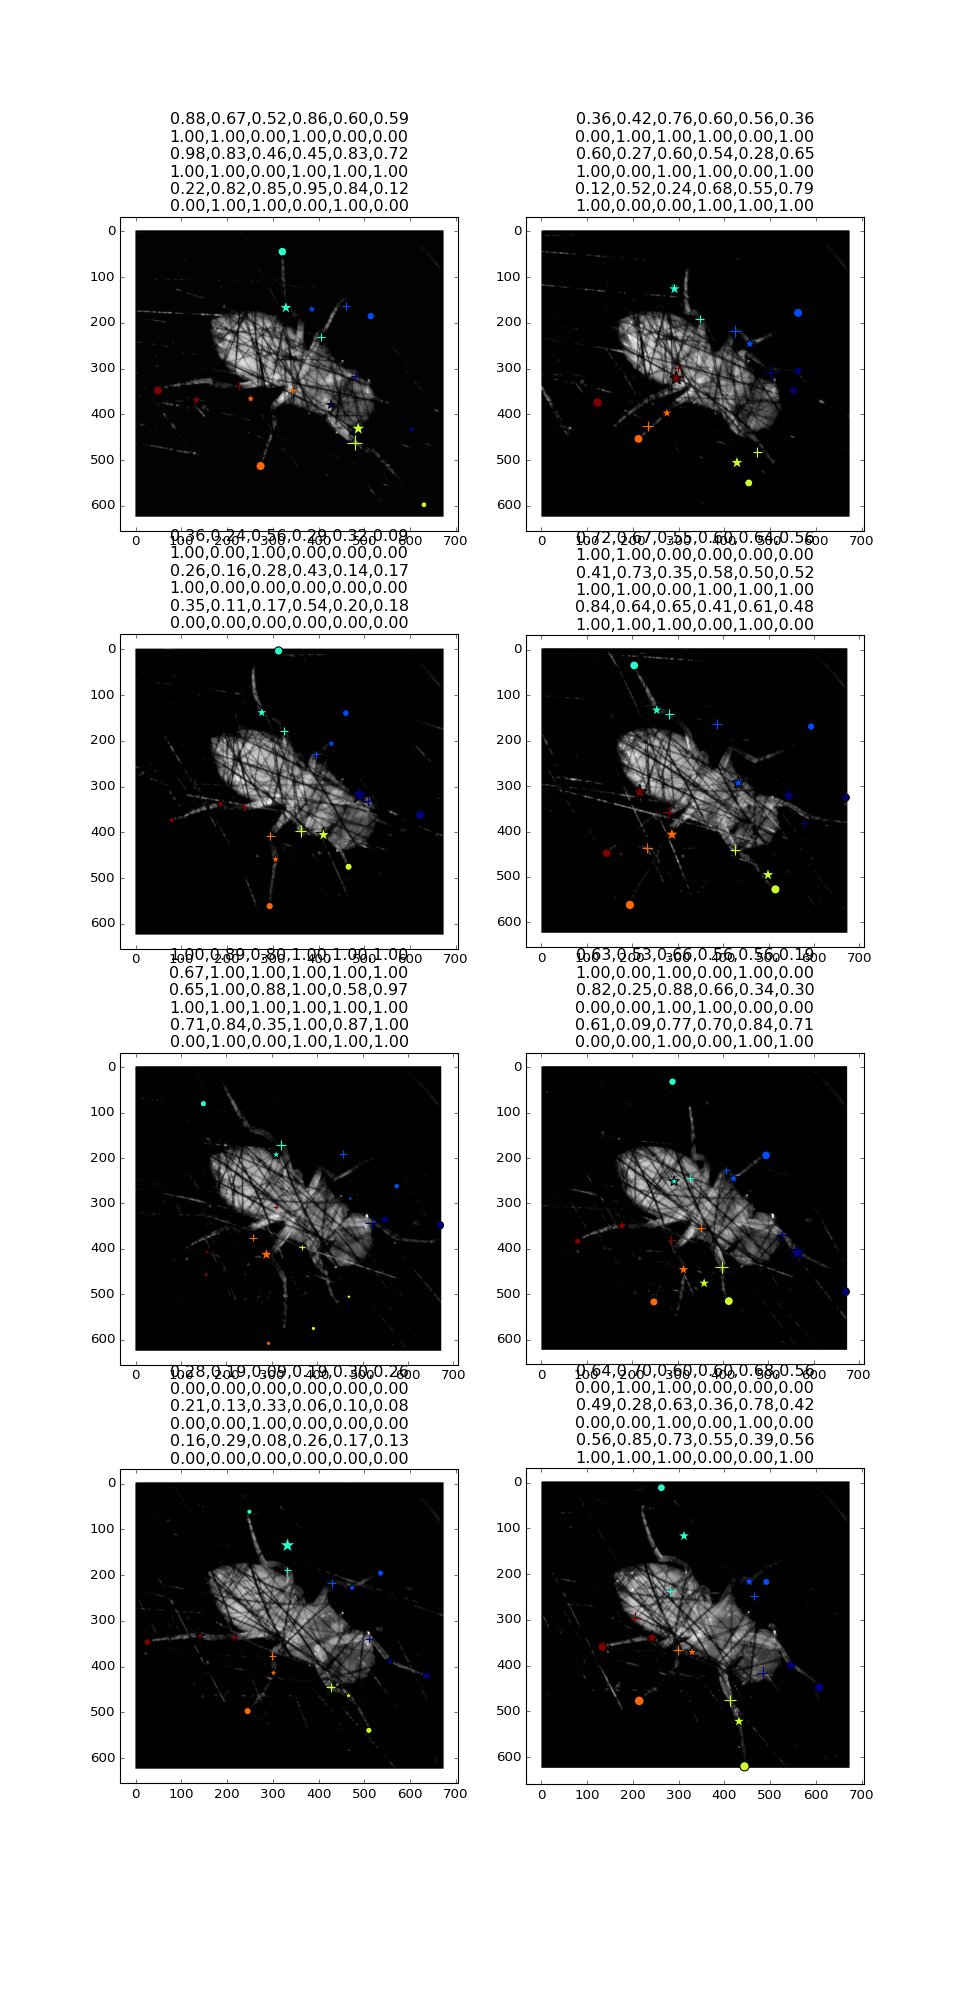

In [3]:
# Interactive plots from
# http://matplotlib.1069221.n5.nabble.com/how-to-create-interactive-plots-in-jupyter-python3-notebook-td46804.html
get_ipython().magic(u'pylab notebook')
import ipywidgets as widgets
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning, module='.*/ipykernel/.*')
warnings.filterwarnings('ignore', category=DeprecationWarning, module='.*/widgets/.*')

for ndx in range(np.random.randint(50)):
    alllocs = updateFeedDict(conf,'val',distort=True,sess=sess,data=data,feed_dict=feed_dict,ph=ph)
if useNet:
    oo,cc = sess.run([out,cross_entropy],feed_dict=feed_dict)
else:
    oo = feed_dict[ph['y']]
    cc = np.zeros([8,])

ims = feed_dict[ph['X'][0]]

tt = oo.reshape(8,18)
tt = tt.clip(min=0,max=1)
vv = feed_dict[ph['y']].reshape(8,18)
pp = np.abs(tt-vv)
nc = 2; nr = 4
fig = plt.figure(figsize=[12,25])
mrk = ['o','*','+']
ss = [30,100,50]
for idx in range(ims.shape[0]):
    ax = fig.add_subplot(nr,nc,idx+1)
    ax.imshow(ims[idx,:,:,0],cmap='gray')
    tstr = []
    for jj in range(3):
        sz = ss[jj]*(3*pp[idx,jj*6:(jj+1)*6]+0.5)
        ax.scatter(alllocs[idx,jj*6:(jj+1)*6,0],alllocs[idx,jj*6:(jj+1)*6,1],
                   c=np.linspace(0,1,6),cmap=cm.jet,marker=mrk[jj],s=sz)
        tstr.append(','.join('{:.2f}'.format(a) for a in tt[idx,jj*6:(jj+1)*6]))
        tstr.append(','.join('{:.2f}'.format(a) for a in vv[idx,jj*6:(jj+1)*6]))
    ax.set_title('\n'.join(tstr))

In [4]:
# measure different accuracies

pp = np.zeros([800,18])
ii = np.zeros([800,18])
count = 100
for ndx in range(count):
    alllocs = updateFeedDict(conf,'val',distort=True,sess=sess,data=data,feed_dict=feed_dict,ph=ph)
    oo,cc = sess.run([out,cross_entropy],feed_dict=feed_dict)
    oo = oo.reshape(8,18)
    vv = feed_dict[ph['y']].reshape(8,18)
    pp[ndx*8:(ndx+1)*8,:] = oo-vv
    ii[ndx*8:(ndx+1)*8,:] = oo
 


In [5]:
kk = np.abs(pp).mean(axis=0)
print kk

[ 0.37351957  0.36462957  0.35865625  0.37780164  0.38341736  0.37158729
  0.32609855  0.30334961  0.34313757  0.33118896  0.31114904  0.28824829
  0.29417913  0.28848269  0.2441221   0.34445142  0.24741498  0.23517035]


<IPython.core.display.Javascript object>


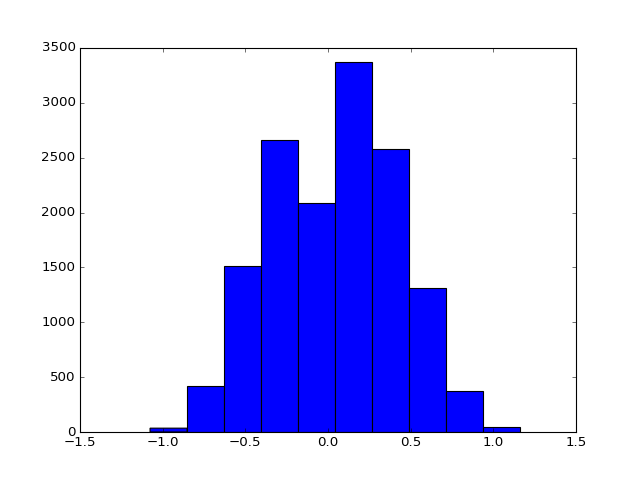

<IPython.core.display.Javascript object>


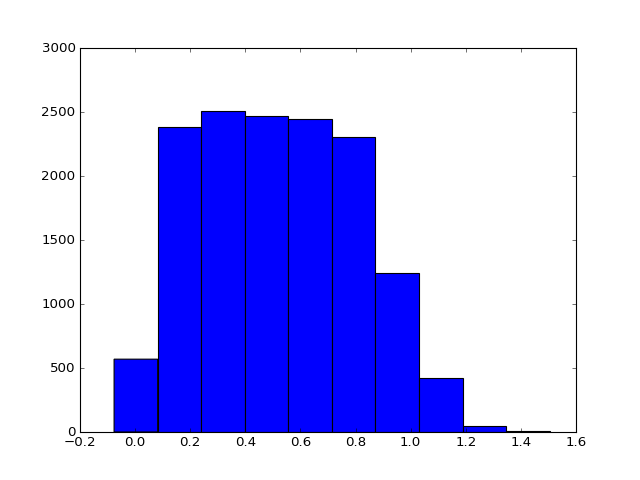

(array([  569.,  2379.,  2511.,  2472.,  2444.,  2303.,  1244.,   424.,
           50.,     4.]),
 array([-0.07629558,  0.0817918 ,  0.23987918,  0.39796656,  0.55605394,
         0.71414132,  0.87222871,  1.03031609,  1.18840347,  1.34649085,
         1.50457823]),
 <a list of 10 Patch objects>)

In [6]:
plt.figure()
plt.hist(pp.flatten())
plt.figure()
plt.hist(ii.flatten())

In [ ]:
vv = tf.global_variables()



import re
aa = [v for v in vv if not re.search('Adam|batch_norm|beta',v.name)]
gg = sess.run(tf.gradients(loss,aa),feed_dict=feed_dict)

kk = sess.run(aa,feed_dict=feed_dict)

ss = [np.sum(np.abs(g.flatten())) for g in gg]
ww = [np.sum(np.abs(g.flatten())) for g in kk]

rr = [s/w for s,w in zip(ss,ww)]

In [ ]:
#for new
bb = [[r,n.name] for r,n in zip(rr,aa)]
for b in bb:
    print b
bbnew = bb

In [ ]:
#for reloaded
bb = [[r,n.name] for r,n in zip(rr,aa)]
for b in bb:
    print b

In [ ]:
for v in vv:
    if re.search('beta|gamma',v.name):
        print v.eval()

In [ ]:
import re
aa = [v for v in vv if not re.search('Adam|batch_norm|beta',v.name)]
gg = sess.run(tf.gradients(loss,aa),feed_dict=feed_dict)

kk = sess.run(aa,feed_dict=feed_dict)

In [ ]:
ss = [np.sum(np.abs(g.flatten())) for g in gg]
ww = [np.sum(np.abs(g.flatten())) for g in kk]

In [ ]:
rr = [s/w for s,w in zip(ss,ww)]

bb = [[r,n.name] for r,n in zip(rr,aa)]
for b in bb:
    print b

In [ ]:
plt.hist(rr)
